### Pandas 란?
데이터 처리와 데이터 분석에 최적화된 라이브러리
- 행과 열로 이루어진 데이터 객체를 만들어서 다룰 수 있음
- 빅 데이터를 처리하고 분석하는데 매우 편리한 함수들을 제공

### 0. Pandas 라이브러리 불러오기 

In [132]:
import pandas as pd

### 1. Pandas 구조
- Series : 1차원 데이터 (index + value )
- DataFrame : 2차원 데이터 (행과 열로 이루어진 표 형태), Series 가 모여서 DF가 완성됨

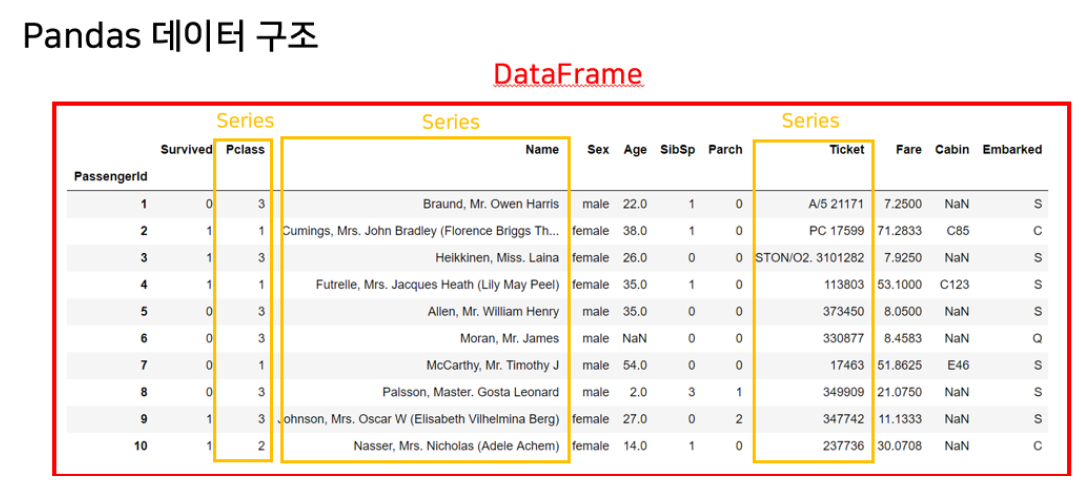

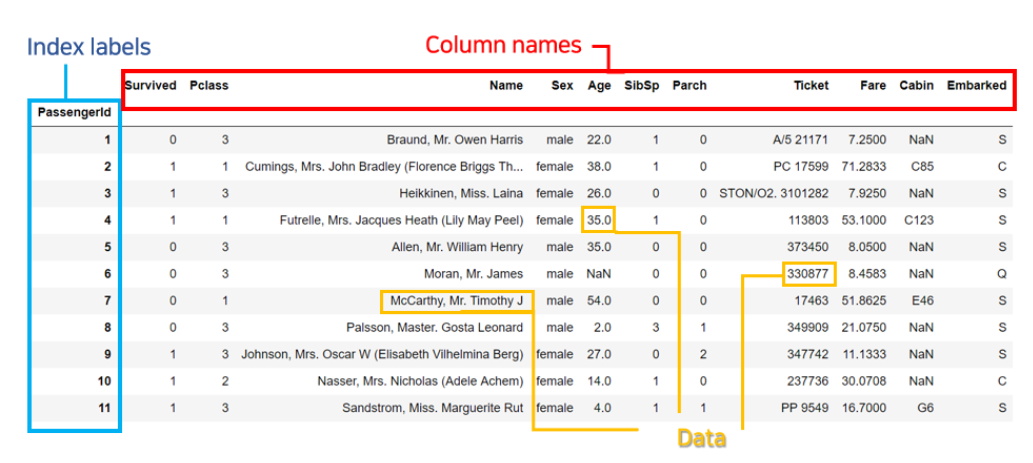

### 2. Pandas 객체 생성해보기 !

#### series 생성

In [2]:
# 인덱스를 따로 설정하지 않아도 좌측에 자동으로 인덱스 번호가 생성
population = pd.Series([9904312, 3448737, 2890451, 2466052])
population

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

#### 인덱스를 지정하여 Series 생성

In [3]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                      index=['서울','부산','인천','대구']
                      )
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

#### 딕셔너리 형태로 Series 생성

In [4]:
population = pd.Series({'서울':9904312, '부산':3448737, '인천':2890451, '대구':2466052})
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

##### Series 이름, 인덱스 이름지정

In [5]:
# Series 이름 설정
population.name = '인구'
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [6]:
# Series의 index 이름 설정
population.index.name='도시'
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [7]:
population.index = ['1','2','3','4']
population

1    9904312
2    3448737
3    2890451
4    2466052
Name: 인구, dtype: int64

#### Series 데이터갱신 , 추가 , 삭제

In [8]:
#데이터 갱신
population['대전'] = 350000000
population

1       9904312
2       3448737
3       2890451
4       2466052
대전    350000000
Name: 인구, dtype: int64

In [9]:
# 데이터 삭제
del population['서울']
population

KeyError: '서울'

#### DataFrame 생성

- 딕셔너리 이용 데이터프레임 생성

In [10]:
data = {'2015':[9904312, 3448737, 2890451, 2466052],
        '2010':[9631482, 3393191, 2632035, 2431774]
       }

In [11]:
# Series와는 달리 key값이 컬럼명으로 들어감 (Series에서는 key값이 index로 들어감)
population_df1 = pd.DataFrame(data)
population_df1

,2015,2010
0,9904312,9631482
1,3448737,3393191
2,2890451,2632035
3,2466052,2431774


In [12]:
data = [[9904312, 3448737, 2890451, 2466052],
        [9631482, 3393191, 2632035, 2431774]]
       
col = ['서울','부산','인천','대구']

ind = ['2015','2010']

In [13]:
population_df2 = pd.DataFrame(data, columns=col, index=ind)
population_df2

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


#### 정리

- DF 를 생성하는 방법은 2가지 (딕셔너리, 리스트)
- 딕셔너리 방식은 value값이 위에서 아래쪽으로 들어가고
- 리스트 방식은 개행을 해주면 보이는 위치 그대로 들어감

In [14]:
# 역행렬 (전치 ): .T
# T : transpositon
population_df2.T

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [15]:
population_df2 = population_df2.T
population_df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


#### DF에 새로운 컬럼 추가하기

In [16]:
population_df2['2005'] = [9762546, 3512547, 2517680, 2456016]
population_df2

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2456016


In [17]:
# drop : DF의 행 or 열 삭제
# drop 은 디폴트 값으로 행을 삭제(axis=0 : 행 삭제, axis = 1 : 열 삭제)
population_df2.drop('2005', axis=1, inplace=True)

In [18]:
population_df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


#### 정리

- del은 열 방향으로만 삭제
- drop은 행, 열 방향으로 삭제 (축 방항(axis=)을 설정해줘야함)

In [19]:
# 데이터 프레임의 형태를 확인
population_df2.shape

(4, 2)

In [20]:
# 데이터 프레임의 데이터 값만 확인
population_df2.values

array([[9904312, 9631482],
       [3448737, 3393191],
       [2890451, 2632035],
       [2466052, 2431774]], dtype=int64)

In [21]:
data1 = [[175.3, 66.2, 27.0],
        [180.2, 78.9, 49.0],
        [178.6, 55.1, 35.0]
        ]

col1 = ['홍길동', '김사또','임꺽정']

ind1 = ['키','몸무게','나이']


In [22]:
infor = pd.DataFrame(data1)
infor

,0,1,2
0,175.3,66.2,27.0
1,180.2,78.9,49.0
2,178.6,55.1,35.0


In [23]:
infor = pd.DataFrame(data1, index=ind1, columns = col1)
infor2 = pd.DataFrame(data1, index=col1, columns = ind1)
infor2

,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


In [24]:
infor.T

,키,몸무게,나이
홍길동,175.3,180.2,178.6
김사또,66.2,78.9,55.1
임꺽정,27.0,49.0,35.0


### 3. Pandas 연산

- numpy와 마찬가지로 연산이 가능

In [25]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                       index=['서울', '부산', '인천', '대구']
                      )
population2 = pd.Series({'서울':9631482, '부산':3393191,
                         '인천':2632035, '대전':1490158})


In [26]:
population/1000000

서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
dtype: float64

In [27]:
population2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [28]:
population - population2

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

- DF 연산

In [29]:
population_df1

,2015,2010
0,9904312,9631482
1,3448737,3393191
2,2890451,2632035
3,2466052,2431774


In [30]:
population_df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [31]:
population_df1 - population_df2

,2015,2010
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
대구,NaN,NaN
부산,NaN,NaN
서울,NaN,NaN
인천,NaN,NaN


In [32]:
population_df1.index = ['서울','부산','인천','대구']
population_df1

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [33]:
# 인덱스가 같으면 같은 컬럼명의 데이터들끼리 연산
population_df2 - population_df1

,2015,2010
서울,0,0
부산,0,0
인천,0,0
대구,0,0


### 

### 4. Pandas에서 데이터 접근을 위한 인덱싱, 슬라이싱
- 인덱스 번호로 접근
- 인덱스 명칭으로 접근
- boolean 인덱싱 : True , False값을 이용하여 True에 해당하는 행 출력
- loc, iloc 인덱서 활용하여 접근

#### Series 인덱싱 

In [34]:
score = pd.Series({'java':70, 'python':95, 'html/css':80, 'ML':82})
score

java        70
python      95
html/css    80
ML          82
dtype: int64

In [35]:
# python 인덱스 번호로 데이터에 접근
score[1]

95

In [36]:
# python 인덱스 번호로 데이터에 접근
score['python']

95

In [37]:
# 인덱스 명 자체에 접근하고 싶을 때
score.index[1]

'python'

#### Series 슬라이싱

In [38]:
# python 부터 ML 까지 인덱스 번호로 접근
score[1:] # 1번 인덱스 부터 끝까지

python      95
html/css    80
ML          82
dtype: int64

In [39]:
score.index[1:]

Index(['python', 'html/css', 'ML'], dtype='object')

In [40]:
score.values[1:]

array([95, 80, 82], dtype=int64)

In [41]:
score[1:3] # 인덱스 번호로 슬라이싱 할때는 끝 값으 포함되지 않음

python      95
html/css    80
dtype: int64

In [42]:
score['python':'ML'] #인덱스 명칭일 때는 끝 값 포함

python      95
html/css    80
ML          82
dtype: int64

##### DF 인덱싱, 슬라이싱 

In [43]:
# csv 파일 불러오기 comma separata values
# 인코딩 : 컴퓨터가 글자를 인식할 수 있게 해주는 과정
# euc-kr : 한글 전용 인코딩 방식

score_data = pd.read_csv('data/score.csv', encoding='euc-kr', index_col='과목')
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [44]:
# 1반 컬럼(열)에 접근
score_data['1반']

과목
수학    45
영어    76
국어    47
사회    92
과학    11
Name: 1반, dtype: int64

In [45]:
score_data[['1반']]

,1반
과목,
수학,45
영어,76
국어,47
사회,92
과학,11


In [46]:
# 두 개 이상의 컬럼을 인덱싱 ( 반드시 []두개를 사용해줘야함 )
score_data[['1반' , '3반']]

,1반,3반
과목,,
수학,45,73
영어,76,45
국어,47,45
사회,92,85
과학,11,47


### 
- DF에서는 행 인덱싱을 위해서는 항상 슬라이싱 방식으로 적용해야함 


In [47]:
score_data[0:3:2] # 0번, 2번 인덱스 행

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
국어,47,92,45,69


In [48]:
# 인덱스에 있는 문자    
# 문자와 숫자 섞을수 있다

score_data['수학':'국어':2]

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
국어,47,92,45,69


####  loc , iloc를 활용한 인덱싱, 슬레이싱
- 행과 열에 모두 접근 가능
- 기본적으로는 행에 먼저 접근
- loc : 인덱스명, 컬럼명으로 접근
- iloc : 인덱스 번호로 접근

In [49]:
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [50]:
# 각 반의 과학 점수에 접근
score_data['과학':'과학']

,1반,2반,3반,4반
과목,,,,
과학,11,79,47,26


In [51]:
# 각 반의 과학 점수에 접근
score_data.loc['과학']

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [52]:
# 각 반의 과학 점수에 접근 표로 보여주기
score_data.loc[['수학']]


,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39


In [53]:
# 4반의 과학 점수에 접근
score_data.loc['과학':,'4반']

과목
과학    26
Name: 4반, dtype: int64

In [54]:
# 4반의 과학 점수에 접근
score_data.iloc[4,3]

26

- 2반의 사회 점수에 접근해보시오 (2가지 방식 모두 사용) 

In [55]:
print(score_data.loc['사회','2반'])
print(score_data.iloc[3,1])

81
81


###

- 2반, 3반의 국어, 사회 점수에 접근 

In [56]:
score_data.loc['국어':'사회','2반':'3반']

,2반,3반
과목,,
국어,92,45
사회,81,85


In [57]:
score_data.iloc[2:4,1:3]

,2반,3반
과목,,
국어,92,45
사회,81,85


In [58]:
score_data.loc['국어':'사회','2반':'3반'] * score_data.iloc[2:4,1:3]

,2반,3반
과목,,
국어,8464,2025
사회,6561,7225


#### 불리언 인덱싱 (boolean indexing)
- DF에서 특정한 조건에 맞는 데이터에만 접근하는 방식
- 특정 조건으로 value 값을 True , False로 출력하여 True 값에만 접근

In [59]:
score_data = score_data.T
score_data

과목,수학,영어,국어,사회,과학
1반,45,76,47,92,11
2반,44,92,92,81,79
3반,73,45,45,85,47
4반,39,69,69,40,26


In [60]:
# Step.1
# score_data의 영어 점수 중 75점 이상인 데이터를 True로 출력
score_data['영어'] >= 75

1반     True
2반     True
3반    False
4반    False
Name: 영어, dtype: bool

In [61]:
# Step.2
# True 에 해당하는 값의 행 전체 데이터에 접근
score_data[score_data['영어'] >= 75]

과목,수학,영어,국어,사회,과학
1반,45,76,47,92,11
2반,44,92,92,81,79


In [62]:
# Step.3
# 영어 점수만 확인해보기
score_data[score_data['영어'] >= 75][['영어']]

과목,영어
1반,76
2반,92


### -- 과학 점수가 50점 이상인 반의 수학, 국어 점수에 접근하시오

In [63]:
score_data[score_data['과학'] >= 50][['수학','국어']]

과목,수학,국어
2반,44,92


- 사회 점수가 50점 이상이고, 과학 점수도 50점 이상인 반의 수학, 영어 점수에 접근하시오 

In [64]:
score_data[score_data['사회'] >=50][score_data['과학'] >=50][['수학','영어']]

C:\Users\SMHRD\AppData\Local\Temp/ipykernel_5960/3925236056.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  score_data[score_data['사회'] >=50][score_data['과학'] >=50][['수학','영어']]


과목,수학,영어
2반,44,92


In [65]:
score_data[(score_data['사회'] >=50) & (score_data['과학'] >=50)][['수학','영어']]

과목,수학,영어
2반,44,92


### 5. Pandas 유용한 함수들 

#### 정렬
- 인덱스 기준 정렬 : sort_index()
- 값 기준 정렬 : sort_values()

In [66]:
score_data = score_data.T
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [67]:
# index 기준 정렬
# 한글일 경우 가, 나 , 다 순서로 정렬
score_data.sort_index()

,1반,2반,3반,4반
과목,,,,
과학,11,79,47,26
국어,47,92,45,69
사회,92,81,85,40
수학,45,44,73,39
영어,76,92,45,69


In [68]:
# 값(values) 기준 정렬
# DF에서 컬럼이 여러개일 경우 기준이 되는 컬럼을 설정해줘야 함 (by=)
# 디폴트값이 오름차순 (3반 점수 기준으로 오름차순 정렬)
score_data.sort_values(by='3반')

,1반,2반,3반,4반
과목,,,,
영어,76,92,45,69
국어,47,92,45,69
과학,11,79,47,26
수학,45,44,73,39
사회,92,81,85,40


In [69]:
# ascending=False : 내림차순 정렬
score_data.sort_values(by='3반',ascending=False)

,1반,2반,3반,4반
과목,,,,
사회,92,81,85,40
수학,45,44,73,39
과학,11,79,47,26
영어,76,92,45,69
국어,47,92,45,69


In [70]:
# 3반 기준으로 정렬 후, 같은 값들은 1반 기준으로 한번 더 정렬
score_data.sort_values(by=['3반', '1반'])

,1반,2반,3반,4반
과목,,,,
국어,47,92,45,69
영어,76,92,45,69
과학,11,79,47,26
수학,45,44,73,39
사회,92,81,85,40


In [71]:
# Series 는 1차원이라 기준을 정해줄 필요가 없음
score_data['3반'].sort_values(ascending=False)

과목
사회    85
수학    73
과학    47
영어    45
국어    45
Name: 3반, dtype: int64

#### sum() 

In [72]:
# axis=0 : 행 방향 기준 합
# axis=1 : 열 방향 기준 합
score_data.sum(axis=1)

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

- 과목별 합계를 구하여 DF 맨 우츠게 '총합' 커럼으로 추가해보세요

In [73]:
score_data['총합']=score_data.sum(axis=1)
socre_data

NameError: name 'socre_data' is not defined

#### mean()
- 평균

In [74]:
#mean() 함수를 이용하여 평균을 구하고 DF우측에 평균컬럼을 추가
score_data['평균']=score_data.iloc[:5,0:4].mean(axis=1)
score_data

,1반,2반,3반,4반,총합,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


In [78]:
#반별 평균을 구하여 새롭게 행에 추가하기!
score_data.loc['반평균'] = score_data.iloc[:5,:6].mean(axis=0)
score_data

,1반,2반,3반,4반,총합,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


In [79]:
# 전체 데이터중 가장 큰 값들 확인하기 ! ->> max()
score_data.max()

1반     92.0
2반     92.0
3반     85.0
4반     69.0
총합    298.0
평균     74.5
dtype: float64

In [80]:
# 전체 데이터중 가장 작은 값 --> min()
score_data.min()

1반     11.00
2반     44.00
3반     45.00
4반     26.00
총합    163.00
평균     40.75
dtype: float64

In [83]:
# 과목별 기준 가장 높은값과 낮은값 구하기 !
# axis를 활용하여 연산의 축 결정하기

score_data.loc[:'과학',:'4반'].max(axis=1)

과목
수학    73.0
영어    92.0
국어    92.0
사회    92.0
과학    79.0
dtype: float64

In [84]:
score_data.loc[:'과학',:'4반'].max(axis=0)

1반    92.0
2반    92.0
3반    85.0
4반    69.0
dtype: float64

In [91]:
# 과목별 가장 큰 값과 가장 작은값의 차이값 구하기!
# 1. 과목별 가장 큰 값 구하기 >>> maxArr
# 2. 과목별 가장 작은 값 구하기 --> minArr
# 3. maxArr - minArr
maxArr = score_data.loc[:'과학',:'4반'].max(axis=1)
minArr = score_data.loc[:'과학',:'4반'].min(axis=1)
maxArr - minArr

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [92]:
# apply 함수를 사용한 최대최소 차이값 구하기
# apply(함수, axis=?)

# 어떠한 데이터에 대하여 최대,최소의 차이값을 구하는 새로운 함수 생성
def max_min(x):
    return x.max() - x.min()

In [95]:
score_data.loc['수학':'과학','1반':'4반'].apply(max_min, axis=1)

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [96]:
data_dic = {'A':[1,3,3,4,4], 'B':[1,2,2,3,3], 'C':[1,2,4,4,5]}
df = pd.DataFrame(data_dic)

In [97]:
df

,A,B,C
0,1,1,1
1,3,2,2
2,3,2,4
3,4,3,4
4,4,3,5


In [98]:
# 데이터 값을 기준으로 갯수를 셀 수 있는 함수 -> values_counts
data = df.apply(pd.value_counts)
data

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [99]:
# 결측치 (NaN)를 해결할 수 있는 함수 >>> fillna()
data.fillna(value=0)

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [102]:
# pd.cut(데이터, 범위, labels = 라벨링)
# -> 그룹화가 되어 있지 않은 데이터를 원하는 범위에서 그룹화 해주는 함수 !

# 1 ~ 15 (미성년자) 16 ~ 25(중년) 36 ~ 60(장년) 61 ~ 99 (노년)
# 범위의 시작값은 -1, 끝나는 수는 그대로

ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
bins = [0, 15, 25, 35, 60, 99]
lb = ['미성년자','청년','중년','장년','노년']

data_cut = pd.cut(ages, bins, labels = lb)

In [103]:
data_cut

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '노년', '청년', '장년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [105]:
ageArr = pd.DataFrame(ages, columns=['ages'])
ageArr

,ages
0,0
1,2
2,10
3,21
4,23
5,37
6,31
7,61
8,20
9,41


In [106]:
# 실제 데이터에 카테고리 내용 연결하기
ageArr['age_cat'] = pd.cut(ages, bins, labels = lb)

In [107]:
ageArr

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,중년
7,61,노년
8,20,청년
9,41,장년


In [109]:
ageArr['age_cat'].value_counts(ascending=False)

청년      3
미성년자    2
중년      2
장년      2
노년      1
Name: age_cat, dtype: int64

In [110]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])



In [113]:
# display() >> 여러개의 표를 동시에 띄우기 위한 함수 !
display(df1)
display(df2)
display(df3)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [114]:
# concat() >> 표 병합을 위한 함수
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [138]:
# 멀티인덱스 인덱싱 하는 방법 >>> [(튜플)]
result.loc[('x', 2)]

KeyError: 'x'

In [119]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [122]:
# 행 방향으로 표 병합하기 !
result = pd.concat([df1, df4],axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [123]:
display(df1)
display(df4)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [134]:
import pandas as pd

In [136]:
# 병합시 결측치를 제오히한 공통 부분만 병합하기 >> join 속성
result = pd.concat([df1, df4], axis = 1, join = 'inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [137]:
# 병합시 원하는 데이터를 기준으로 병합을 하기위해
# reindex(데이터.index) 사용
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [139]:
result = pd.concat([df1, df4], ignore_index = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [140]:
df5 = pd.DataFrame({'key':['K0','K2','K3','K4'],
                   'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3']})

df6 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']})

In [141]:
display(df5)
display(df6)

,key,A,B
0,K0,A0,B0
1,K2,A1,B1
2,K3,A2,B2
3,K4,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [142]:
result = pd.merge(df5, df6, on = 'key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


In [145]:
result = pd.merge(df5, df6, on = 'key', how = 'outer')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN
4,K1,NaN,NaN,C1,D1


In [146]:
result = pd.merge(df5, df6, on = 'key', how = 'right')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A1,B1,C2,D2
3,K3,A2,B2,C3,D3
